## **MATHEMATICAL FORMULATION OF THE RIDGE REGRESSSION**

$$
L=\sum_{i=1}^n (y_{i}-\hat{y_{i}})^2\\
b=\bar{y}-m\bar{x}\\
\text{Now to formulate the value of m}\\
L=\sum_{i=1}^n (y_{i}-mx_{i}-\bar{y}+m\bar{x})+\lambda m^2\\
\frac{\partial L}{\partial m}=2\sum_{i=1}^n (y_{i}-mx_{i}-\bar{y}+m\bar{x})(-x_{i}+\bar{x})+2\lambda m\\
=-2\sum(y_{i}-\bar{y}-mx_{i}+m\bar{x})(x_{i}-\bar{x})\\
\lambda m-\sum_{i=1}^n(y_{i}-\bar{y}-m(x_{i}-\bar{x}))=0\\
\lambda m -\sum_{i=1}^n(y_i-\bar{y})(x_{i}-\bar{x})-m(x_{i}-\bar{x})^2=0\\
\lambda m=\sum_{i=1}^n(y_{i}-\bar{y})(x_{i}-\bar{x})+m\sum_{i=1}^n(x_{i}-\bar{x})^2=0\\
\lambda m+m\sum_{i=1}^n(x_{i}-\bar{x})^2=\sum_{i=1}^n(y_{i}-\bar{y})(x_{i}-\bar{x})\\
m=\frac{\sum_{i=1}^n(y_{i}-\bar{y})(x_{i}-\bar{x})}{\sum_{i=1}^n (x_{i}-\bar{x})+\lambda}\tag{1}
$$


In [19]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [20]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=70,random_state=1)


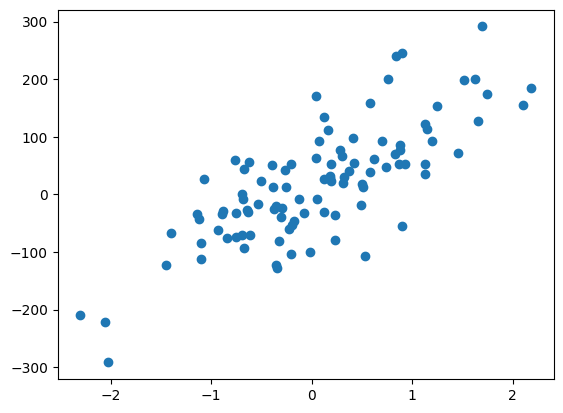

In [21]:
plt.scatter(X,y)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr=LinearRegression()
lr.fit(X,y)
print(lr.coef_,lr.intercept_)

[86.91944862] 14.189100721675988


In [24]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_,rr.intercept_)

[77.08138424] 14.785118720723757


In [25]:
from sklearn.linear_model import Ridge
rr1=Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_,rr1.intercept_)

[38.18416721] 17.141623066449043


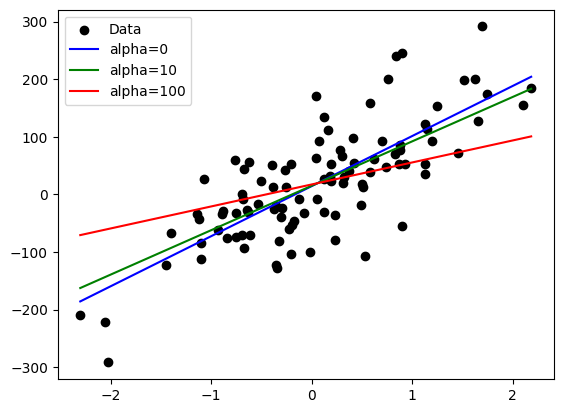

In [31]:
# ...existing code...
plt.scatter(X, y, color='black', label='Data')

# For all models, plot predictions in sorted order of X[:,0]
sorted_idx = np.argsort(X[:, 0])
X_sorted = X[sorted_idx]

plt.plot(X_sorted[:, 0], lr.predict(X_sorted), color='blue', label='alpha=0')
plt.plot(X_sorted[:, 0], rr.predict(X_sorted), color='green', label='alpha=10')
plt.plot(X_sorted[:, 0], rr1.predict(X_sorted), color='red', label='alpha=100')

plt.legend()
plt.show()
# ...existing code...

In [37]:
class RidgeRegression:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.m=None
        self.b=None
    def fit(self,X_train,y_train):
        num=0
        den=0
        for i in range(X_train.shape[0]):
            num=num+(y_train[i]-y_train.mean())*(X_train[i]-X_train.mean())
            den +=((X_train[i]-X_train.mean())**2)
        self.m=num/(den+self.alpha)
        self.b=y_train.mean()-self.m*X_train.mean()
        print(self.m,self.b)
    def predict(self,X_test):
        pass

In [39]:
#ridge regression with class created of our own
ridge=RidgeRegression(alpha=10)
ridge.fit(X,y)

[77.08138424] [14.78511872]
